In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [178]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
#convert sex to integet to be plotable
def replace_val(data,field,val,replace_val):
    data.loc[data[field] == val, field] = replace_val


In [193]:
train_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [194]:
def scatter_plot(x, y, data):
    plt.figure()
    plt.title(x+" vs "+y)
    plt.legend()
    plt.scatter(train_data[x],train_data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

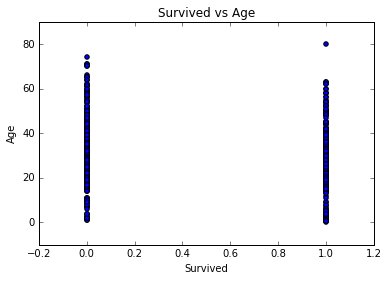

In [161]:
scatter_plot("Survived","Age",train_data)

In [195]:
#Import modules
from sklearn import cross_validation  #splits data in train and test
from sklearn.metrics import make_scorer
from sklearn import grid_search
from sklearn.tree import DecisionTreeRegressor #some estimator

In [226]:
medianAge =train_data["Age"].median()
#function to help drop unwanted columsn and split data randomaly 
#such that 30% of the data is test data and 70% used for training
def prepare_data(data,medianAge):
    #prepare step
    data["Age"] = data["Age"].fillna(medianAge)
    replace_val(data,'Sex',"male",0)
    replace_val(data,'Sex',"female",1)
    data['Embarked'] = data['Embarked'].fillna('S')
    replace_val(data,'Embarked',"S",0)
    replace_val(data,'Embarked',"C",1)
    replace_val(data,'Embarked',"Q",2)
    return data
   
def split_data(data):
    #split step
    target = data['Survived']
    train =data.drop(["Survived","Name","PassengerId","Ticket","Cabin"],1)
    return train, target
    #x_train, x_test, y_train, y_test = cross_validation.train_test_split(train,target,test_size=0.3,random_state=1)
    #return x_train, y_train, x_test, y_test

In [264]:
#Function to determined accuracy of prediction
def accuracy_score(actual,prediction):
    score = 0.0
    for i, val in enumerate(actual):
        pred = round(prediction[i])
        val = val * 1.0
        #print val, pred
        if val == pred:
            score += 1.0
            
    accuracy = score/(len(actual)*1.0)
    
    return accuracy



In [265]:
score_function = make_scorer(accuracy_score,True)
reg = DecisionTreeRegressor()
parameters = { "max_depth": (1,2,3,4,5,6,7)}

In [227]:
data = prepare_data(train_data,medianAge)

In [266]:

x,y = split_data(data) 
grid = grid_search.GridSearchCV(reg, parameters,score_function)
grid.fit(x,y)
print grid.best_score_
print grid.best_params_
estimator = grid.best_estimator_

0.818181818182
{'max_depth': 4}


In [271]:
test_data= pd.read_csv("data/test.csv")
test_data = prepare_data(test_data,medianAge)
test_x = test_data.drop(["Name","PassengerId","Ticket","Cabin"],1)
test_x["Fare"] = test_x["Fare"].fillna(test_x["Fare"].median())
np.shape(test_x)
test_x.describe()


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.805024,0.447368,0.392344,35.576535
std,0.841838,12.667969,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [273]:
predict_y = estimator.predict(test_x)
print predict_y

[ 0.10791367  0.14285714  0.10791367  0.10791367  0.61818182  0.10791367
  0.61818182  0.10791367  0.61818182  0.10791367  0.10791367  0.
  0.98989899  0.10791367  0.98989899  0.89855072  0.10791367  0.10791367
  0.61818182  0.14285714  0.39090909  0.10791367  0.98989899  0.39090909
  0.98989899  0.10791367  0.98989899  0.10791367  0.39090909  0.10791367
  0.10791367  0.10791367  0.61818182  0.07692308  0.39090909  0.10791367
  0.61818182  0.61818182  0.10791367  0.3125      0.10791367  0.39090909
  0.10791367  0.89855072  0.98989899  0.10791367  0.39090909  0.10791367
  0.98989899  0.61818182  0.39090909  0.10791367  0.89855072  0.98989899
  0.10791367  0.10791367  0.10791367  0.10791367  0.10791367  0.98989899
  0.10791367  0.10791367  0.10791367  0.61818182  0.39090909  0.89855072
  0.61818182  0.39090909  0.39090909  0.98989899  0.61818182  0.10791367
  0.61818182  0.39090909  0.98989899  0.39090909  0.10791367  0.89855072
  0.10791367  0.61818182  1.          0.39090909  0.       